In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [3]:
customer = pd.read_csv(r"C:\Users\gaura\Desktop\Analytics labs\Python\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")


In [5]:
spend = pd.read_csv(r"C:\Users\gaura\Desktop\Analytics labs\Python\Case Study 2 - Credit Card Case Study\spend.csv")


In [6]:
repay = pd.read_csv(r"C:\Users\gaura\Desktop\Analytics labs\Python\Case Study 2 - Credit Card Case Study\Repayment.csv")

In [7]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [8]:
customer.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [9]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [10]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [11]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [12]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [13]:
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [14]:
repay.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [15]:
repay.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [16]:
repay.drop(columns='Unnamed: 4',inplace=True)
repay.head()

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88


In [17]:
repay.dropna(inplace=True)
repay.isnull().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

In [18]:
repay

,SL No:,Customer,Month,Amount
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
5,6.0,A1,23-Feb-05,365366.62
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


# Question 1 (a)

In [19]:
mean_real = customer["Age"].mean()
mean_real

46.49

In [20]:
customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()
mean_new = customer["Age"].mean()
mean_new

48.39940000000001

In [21]:
print("The new mean of Age column is",mean_new)

The new mean of Age column is 48.39940000000001


# Question 1 (b)

In [22]:
customer.head()
spend.head()
customer_spend = pd.merge(left=customer,right=spend,on="Customer",how="inner")
customer_spend.head()
customer_spend[customer_spend["Amount"] > customer_spend['Limit']]
customer_spend.loc[customer_spend["Amount"] > customer_spend["Limit"],"Amount"] = (50 * customer_spend["Limit"]).div(100)
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


# Question 1 (c)

In [23]:
repay.head()
customer_repay = pd.merge(left=repay,right=customer,on="Customer",how="inner")
customer_repay
customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]
customer_repay.loc[customer_repay["Amount"] > customer_repay["Limit"],"Amount"] = customer_repay["Limit"]
customer_repay

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,6.0,A1,23-Feb-05,365366.62,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1494,277.0,A7,22-Nov-05,55108.71,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1495,295.0,A7,3-Dec-05,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,313.0,A7,23-Feb-05,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,331.0,A7,31-Mar-06,100001.00,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


# Question 2 (a)

In [24]:
distinct_customers = customer["Customer"].nunique()
distinct_customers
print("Number of distinct customers are",distinct_customers)


Number of distinct customers are 100


# Question 2 (b)

In [25]:
customer["Segment"].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

# Question 2 (c)

In [57]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [56]:
#converting Month column of "spend" table to date time format

spend['Month'] = pd.to_datetime(spend['Month'])

In [58]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [59]:
#creating new columns which show "Month" and "Year"

spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Yearly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [60]:
spend.head()

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


In [63]:
#grouping the dataset based on 'Yearly' and 'monthly'

customer_spend_group= round(spend.groupby(['Yearly','Monthly']).mean(),2)

C:\Users\gaura\AppData\Local\Temp\ipykernel_16452\3978879173.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_spend_group= round(spend.groupby(['Yearly','Monthly']).mean(),2)


In [64]:
customer_spend_group

Sl No:     Amount
Yearly Monthly                     
2004   April      730.50  235272.04
       February   749.50  221215.27
       January    751.62  251712.07
       March      725.50  232146.12
       May        733.50  217539.24
       November   745.50  270486.40
       September  741.50  310923.38
2005   April      730.00  252181.33
       August     749.50  233734.63
       December   762.50  147503.06
       February   750.67  229802.28
       January    746.50  292741.37
       July       757.50  229116.66
       June       755.50  262688.11
       May        747.30  245696.52
       November   749.50  286143.32
       October    760.50  194568.64
       September  759.50  188666.20
2006   April      744.41  232468.97
       August     770.50  240699.72
       December   774.50  270470.98
       February   757.83  253858.26
       January    763.50  282058.01
       July       754.50  287505.10
       June       768.50  177252.39
       March      750.90  247166.08
       May        744.25  236162.74
       November   758.50  182841.29
       October    772.50  236136.34
       September  771.50  158520.09

# Question 2 (d)

In [26]:
repay.dtypes

SL No:      float64
Customer     object
Month        object
Amount      float64
dtype: object

In [27]:
repay["Month"] = pd.to_datetime(repay["Month"])
repay["Month"].dtypes

dtype('<M8[ns]')

In [28]:
repay['Months'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repay['Year'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
repay

,SL No:,Customer,Month,Amount,Months,Year
1,2.0,A1,2004-01-03,245899.02,January,2004
2,3.0,A1,2004-01-15,259490.06,January,2004
3,4.0,A1,2004-01-25,437555.12,January,2004
4,5.0,A1,2005-01-17,165972.88,January,2005
5,6.0,A1,2005-02-23,365366.62,February,2005
...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,May,2005
1496,1497.0,A68,2006-05-10,319836.49,May,2006
1497,1498.0,A69,2006-07-11,247628.45,July,2006
1498,1499.0,A70,2005-08-12,454016.51,August,2005


In [29]:
repay['Months'] = pd.to_numeric(repay['Months'], errors='coerce')
repay = repay.fillna(0)

repay_new = round(repay.groupby(['Year','Months']).mean(numeric_only=True),2)


# Question 2 (e)

In [65]:
#merging all the three tables. Alreaady merged customer and spend table in 'customer_spend'. Using "customer_spend" and "repay"
#table to form the final "customer_spend_repay" table

customer_spend_repay = pd.merge(left=customer_spend,right=repay,on="Customer",how="inner")

In [66]:
customer_spend_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,Year_x,Monthly,SL No:,Month_y,Amount_y,Months,Year_y
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004,January,2.0,2004-01-03,245899.02,0.0,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004,January,3.0,2004-01-15,259490.06,0.0,2004


In [67]:
# renaming the columns for clearity

customer_spend_repay.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)

In [68]:
customer_spend_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Spend_Amount,Year_x,Monthly,SL No:,Month_y,Repay_Amount,Months,Year_y
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004,January,2.0,2004-01-03,245899.02,0.0,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004,January,3.0,2004-01-15,259490.06,0.0,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004,January,4.0,2004-01-25,437555.12,0.0,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004,January,5.0,2005-01-17,165972.88,0.0,2005
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004,January,6.0,2005-02-23,365366.62,0.0,2005


In [70]:
# grouping the data based on "Yearly","Month_x" columns to get the 'Spend_Amount'and 'Repay_Amount'

interest_group = customer_spend_repay.groupby(["Year_y","Month_y"])['Spend_Amount','Repay_Amount'].sum()

C:\Users\gaura\AppData\Local\Temp\ipykernel_16452\3277553886.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest_group = customer_spend_repay.groupby(["Year_y","Month_y"])['Spend_Amount','Repay_Amount'].sum()


In [71]:
interest_group

Spend_Amount  Repay_Amount
Year_y Month_y                               
2004   2004-01-03  2.718220e+08  4.380450e+08
       2004-01-12  2.623934e+08  4.518561e+08
       2004-01-15  2.793801e+08  4.618973e+08
       2004-01-25  2.696189e+08  3.384937e+08
       2004-02-05  7.613922e+07  1.602419e+08
...                         ...           ...
2006   2006-09-03  5.395681e+07  8.083199e+07
       2006-10-03  5.285823e+07  7.890924e+07
       2006-11-03  4.779659e+07  7.228817e+07
       2006-11-21  6.468705e+07  6.329502e+07
       2006-12-03  4.585222e+07  7.087702e+07

[74 rows x 2 columns]

In [72]:
# Monthly Profit = Monthly repayment – Monthly spend.

interest_group['Monthly Profit'] = interest_group['Repay_Amount'] - interest_group['Spend_Amount']

In [73]:
interest_group

Spend_Amount  Repay_Amount  Monthly Profit
Year_y Month_y                                               
2004   2004-01-03  2.718220e+08  4.380450e+08    1.662231e+08
       2004-01-12  2.623934e+08  4.518561e+08    1.894627e+08
       2004-01-15  2.793801e+08  4.618973e+08    1.825171e+08
       2004-01-25  2.696189e+08  3.384937e+08    6.887480e+07
       2004-02-05  7.613922e+07  1.602419e+08    8.410268e+07
...                         ...           ...             ...
2006   2006-09-03  5.395681e+07  8.083199e+07    2.687518e+07
       2006-10-03  5.285823e+07  7.890924e+07    2.605102e+07
       2006-11-03  4.779659e+07  7.228817e+07    2.449158e+07
       2006-11-21  6.468705e+07  6.329502e+07   -1.392035e+06
       2006-12-03  4.585222e+07  7.087702e+07    2.502480e+07

[74 rows x 3 columns]

In [74]:
#interest earned is 2.9% of Monthly Profit

interest_group['Interest Earned'] = (2.9* interest_group['Monthly Profit'])/100

In [75]:
interest_group

Spend_Amount  Repay_Amount  Monthly Profit  Interest Earned
Year_y Month_y                                                                
2004   2004-01-03  2.718220e+08  4.380450e+08    1.662231e+08     4.820469e+06
       2004-01-12  2.623934e+08  4.518561e+08    1.894627e+08     5.494418e+06
       2004-01-15  2.793801e+08  4.618973e+08    1.825171e+08     5.292997e+06
       2004-01-25  2.696189e+08  3.384937e+08    6.887480e+07     1.997369e+06
       2004-02-05  7.613922e+07  1.602419e+08    8.410268e+07     2.438978e+06
...                         ...           ...             ...              ...
2006   2006-09-03  5.395681e+07  8.083199e+07    2.687518e+07     7.793803e+05
       2006-10-03  5.285823e+07  7.890924e+07    2.605102e+07     7.554795e+05
       2006-11-03  4.779659e+07  7.228817e+07    2.449158e+07     7.102559e+05
       2006-11-21  6.468705e+07  6.329502e+07   -1.392035e+06    -4.036902e+04
       2006-12-03  4.585222e+07  7.087702e+07    2.502480e+07     7.257193e+05

[74 rows x 4 columns]

# Question 2 (f)

In [76]:
spend.head()

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


In [77]:
#top 5 product types on which customer is spending

spend['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

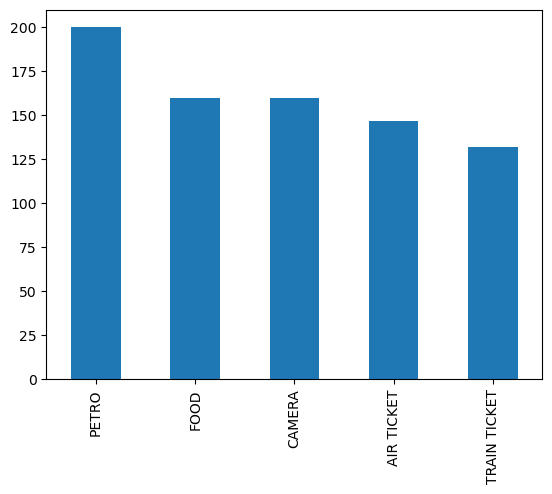

In [78]:
spend['Type'].value_counts().head(5).plot(kind='bar')
plt.show()

# Question 2 (g)

In [30]:
city_spend = customer_spend.groupby("City")["Amount"].sum().sort_values(ascending=False)
city_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

# Question 2 (h)

In [31]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


In [32]:
customer_spend['Age'].max()

79.0

In [33]:
customer_spend['Age'].min()

19.0

# Question 2 (i)

In [34]:
customer_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)


,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


# Question 3

In [35]:
customer_spend.head()
customer_spend["Month"] = pd.to_datetime(customer_spend["Month"])
customer_spend['Year'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
customer_spend.head(10)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,2005
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6,2005-02-23,SANDALS,168285.60,2005
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,7,2005-02-01,CAR,23370.20,2005
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103,2004-01-12,TRAIN TICKET,440563.22,2004
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,117,2004-02-05,BUS TICKET,52208.65,2004
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,2006-04-19,AIR TICKET,346925.68,2006


In [36]:
customer_spend_pivot = pd.pivot_table(data = customer_spend,
                                      index=["City","Year"],
                                      columns='Product',
                                      aggfunc="sum",
                                      values="Amount"
                                     )
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

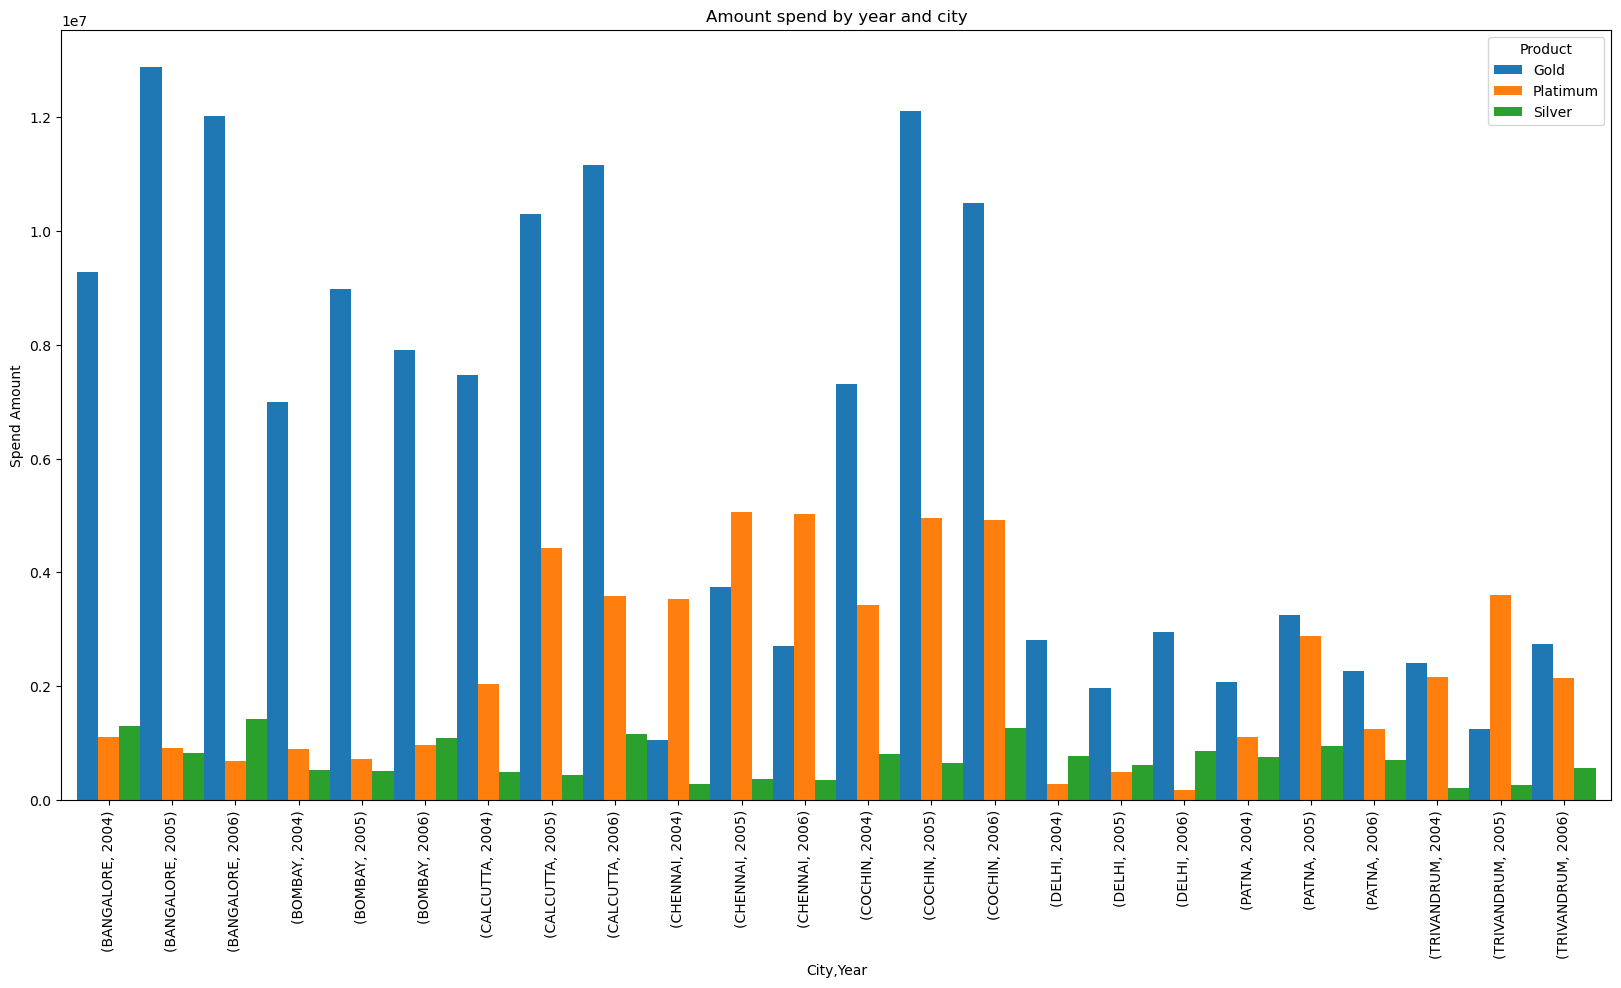

In [37]:
customer_spend_pivot.plot(kind="bar",figsize=(20,10),width=1)
plt.ylabel("Spend Amount")
plt.title("Amount spend by year and city")
plt.show()

# Question 4 (a)

In [38]:
customer_spend.head()
customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_spend.head()
month_city = customer_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()
month_city =pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')
month_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


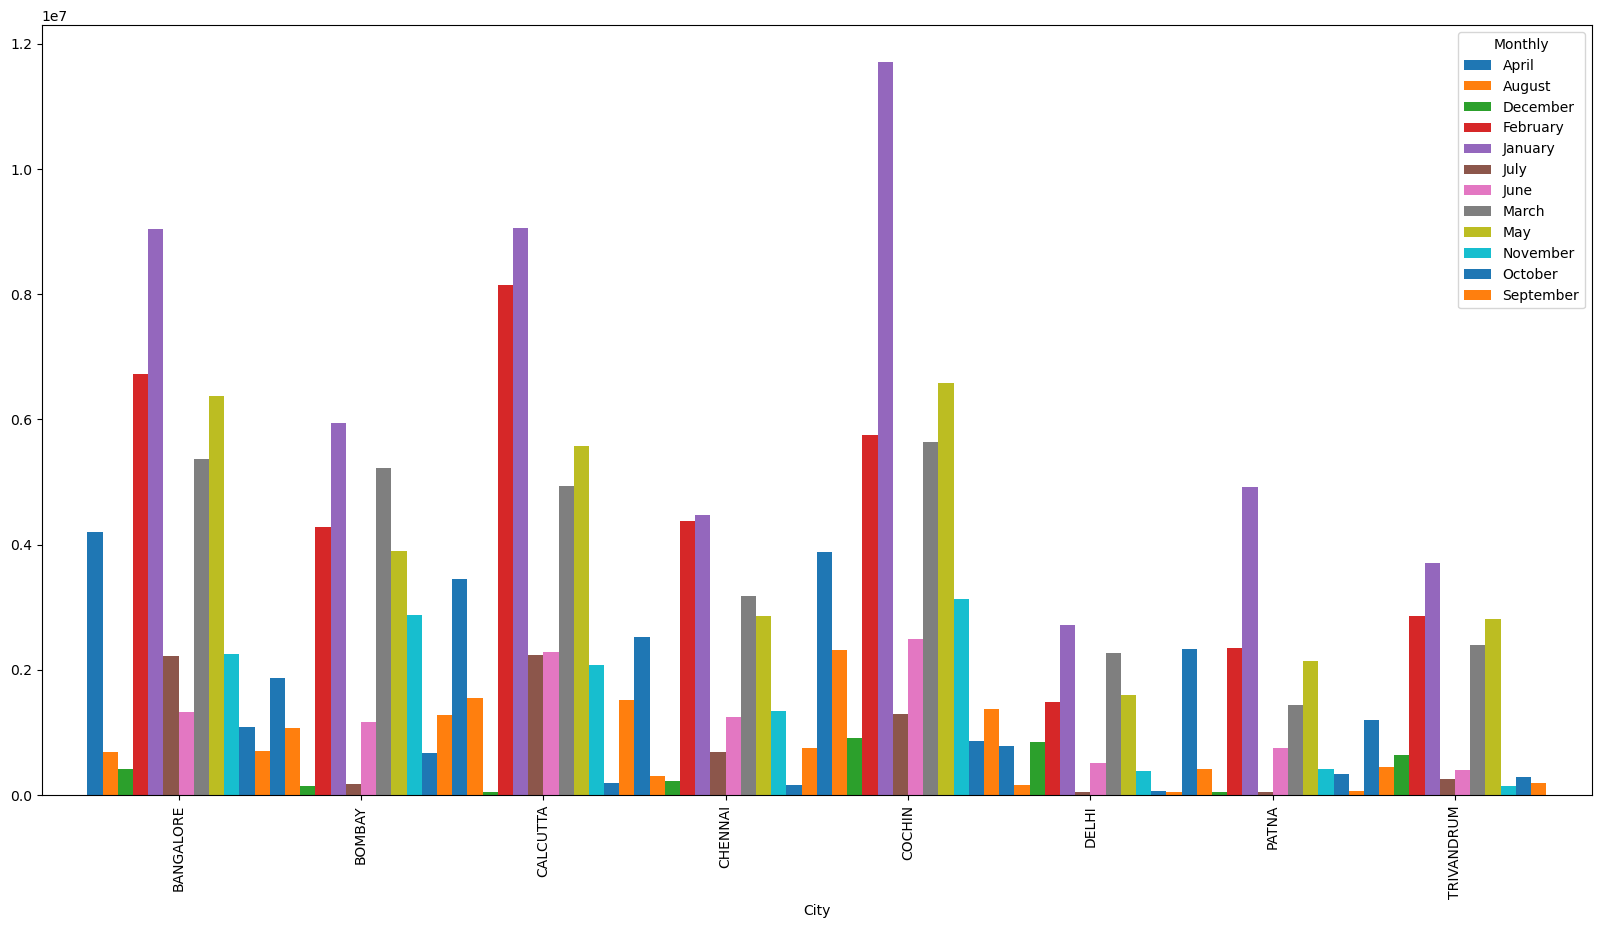

In [39]:
month_city.plot(kind="bar",figsize=(20,10),width=1)
plt.show()

# Question 4 (b)

In [40]:
customer_spend.head()
spend_type = customer_spend.groupby(["Year","Type"])[["Amount"]].sum().reset_index()
spend_type

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72
5,2004,CAR,2326442.62
6,2004,CLOTHES,2685429.91
7,2004,FOOD,7727298.46
8,2004,JEWELLERY,2579785.80
9,2004,MOVIE TICKET,1588392.99


In [41]:
air=spend_type.loc[spend_type["Type"]=="AIR TICKET"]
air

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


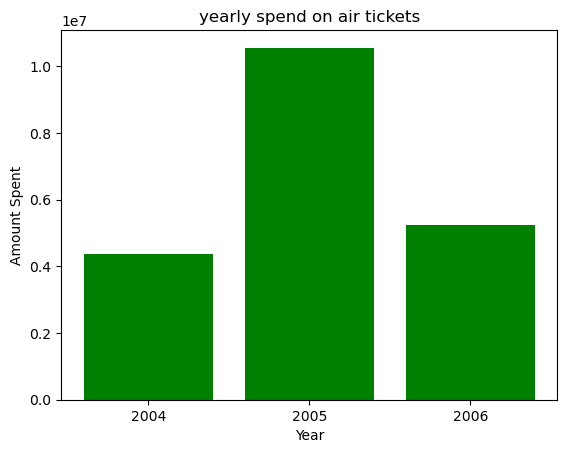

In [42]:
plt.bar(air["Year"],height=air["Amount"],color="green")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("yearly spend on air tickets")
plt.show()

# Question 4 (c)

In [43]:
customer_spend.head()
product_data = pd.pivot_table(data=customer_spend,
                              index='Product',
                              columns='Monthly',
                              values='Amount',
                              aggfunc='sum'
                             )
product_data

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


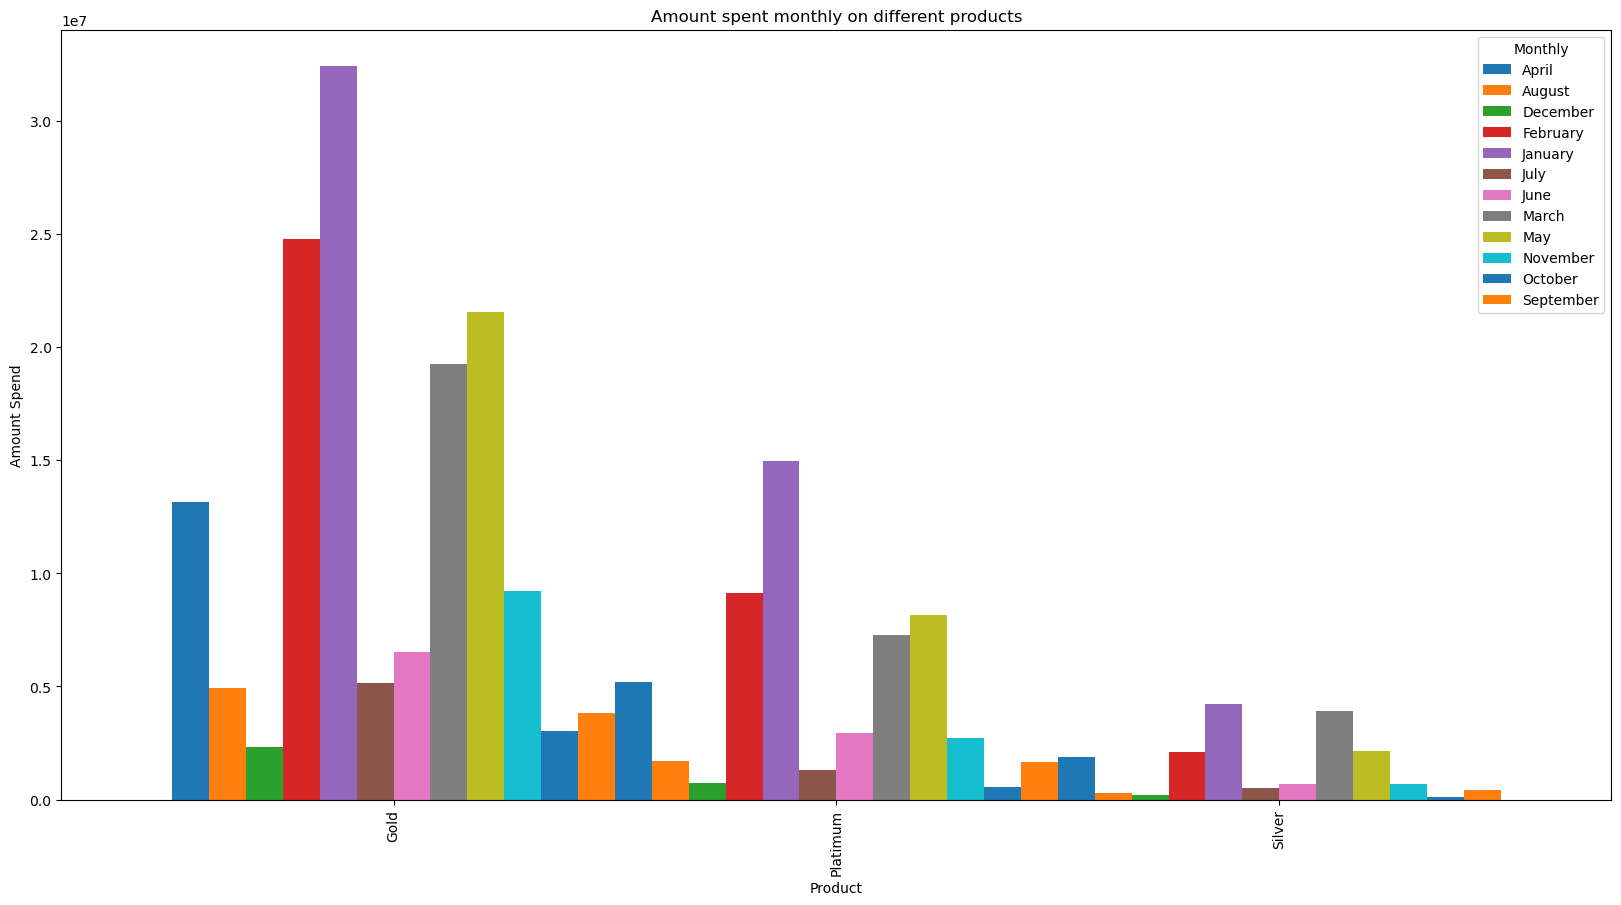

In [44]:
product_data.plot(kind="bar",figsize=(20,10),width=1)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

# Question 5

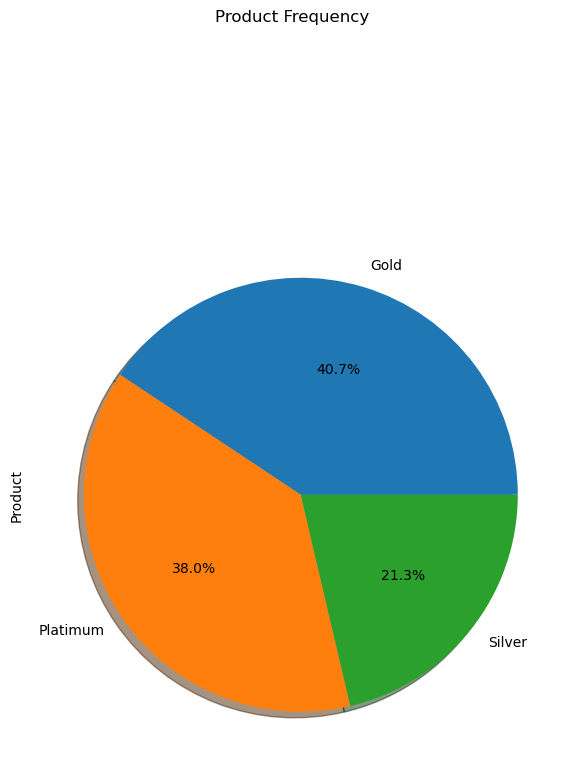

In [45]:
plt.suptitle("Product Frequency")
customer_spend['Product'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,figsize=(7,10),)
plt.show()

In [46]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,2004,January
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,2004,January
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,2004,January
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,2004,January


# For Silver Clients

In [47]:
sil = customer_spend['Product'] == 'Silver'
silver = customer_spend[sil]
silver

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Year,Monthly
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,2004-01-03,RENTAL,50000.00,2004,January
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,2005-02-28,TRAIN TICKET,50000.00,2005,February
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,2004-04-06,BUS TICKET,50000.00,2004,April
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,2004-11-23,PETRO,50000.00,2004,November
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,160,2005-09-03,JEWELLERY,50000.00,2005,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,85,A85,59.0,CHENNAI,Silver,100001.0,C8,Govt,87,2006-03-28,BUS TICKET,50000.50,2006,March
1485,86,A86,25.0,TRIVANDRUM,Silver,100002.0,C9,Govt,88,2006-03-29,TRAIN TICKET,50001.00,2006,March
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89,2006-03-30,RENTAL,50001.50,2006,March
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,2004,January


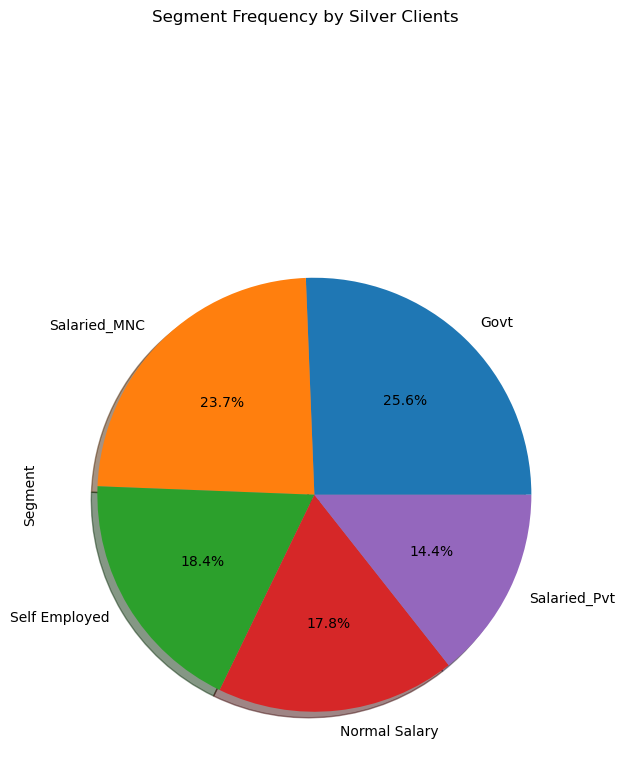

In [48]:
plt.figure(figsize=(7,10))
silver["Segment"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.suptitle("Segment Frequency by Silver Clients")
plt.show()

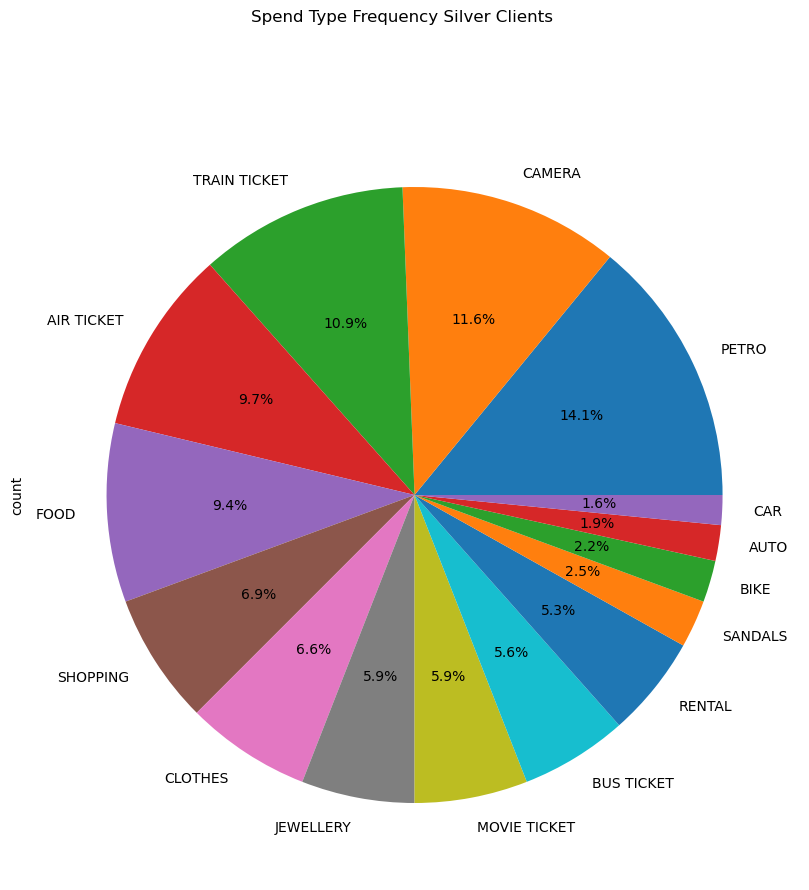

In [108]:
silver["Type"].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,10),)
plt.suptitle("Spend Type Frequency Silver Clients")
plt.show()

# For Gold Clients

In [49]:
gol = customer_spend['Product'] == 'Gold'
gold = customer_spend[gol]
gold

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,91,A91,41.0,BOMBAY,Gold,500000.0,C14,Govt,93,2006-04-03,CLOTHES,89951.84,2006,April
1491,92,A92,78.0,BANGALORE,Gold,500000.0,C15,Govt,94,2006-04-04,FOOD,341858.87,2006,April
1492,93,A93,56.0,DELHI,Gold,500000.0,C16,Govt,95,2004-01-12,CAMERA,297505.09,2004,January
1493,94,A94,31.0,COCHIN,Gold,500000.0,C17,Govt,96,2004-01-03,SANDALS,312714.37,2004,January


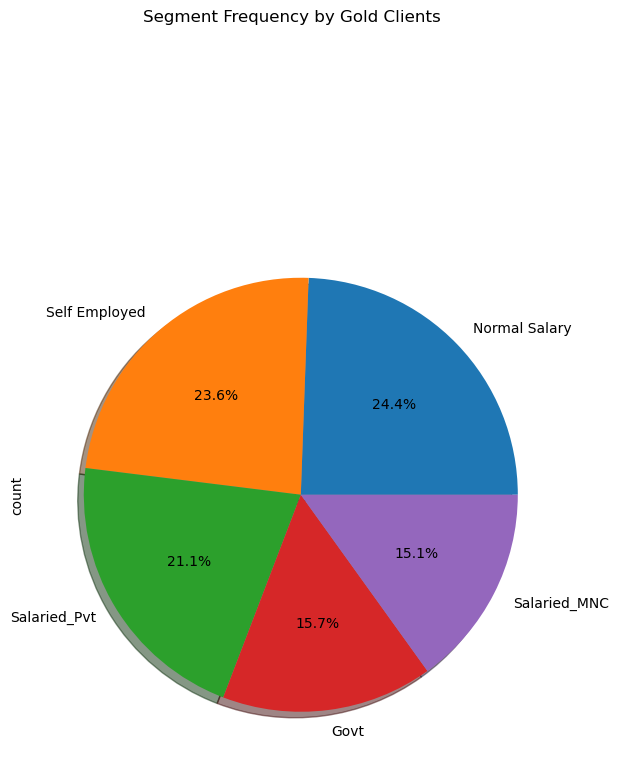

In [110]:
plt.figure(figsize=(7,10))
gold["Segment"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.suptitle("Segment Frequency by Gold Clients")
plt.show()

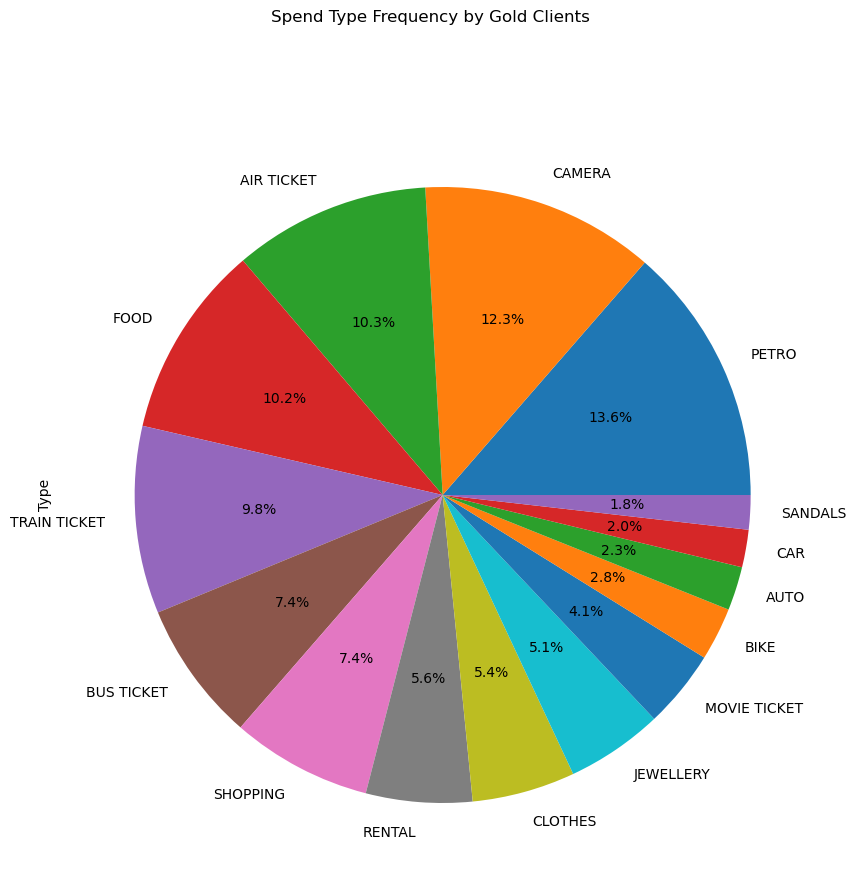

In [50]:
gold["Type"].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,10),)
plt.suptitle("Spend Type Frequency by Gold Clients")
plt.show()

# For Platinum Clients

In [51]:
pla = customer_spend['Product'] == 'Platimum'
platinum = customer_spend[pla]
platinum

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Year,Monthly
29,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,105,2004-01-15,MOVIE TICKET,5000.0,2004,January
30,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,119,2005-02-16,TRAIN TICKET,5000.0,2005,February
31,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,133,2005-04-27,TRAIN TICKET,5000.0,2005,April
32,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,147,2005-05-24,PETRO,5000.0,2005,May
33,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,161,2005-10-03,PETRO,5000.0,2005,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,71,A71,34.0,BOMBAY,Platimum,10002.0,C33,Self Employed,1500,2006-03-24,BUS TICKET,5001.0,2006,March
1482,83,A83,37.0,COCHIN,Platimum,10002.0,C6,Govt,85,2006-03-26,SHOPPING,5001.0,2006,March
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.0,2004,January
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.5,2004,January


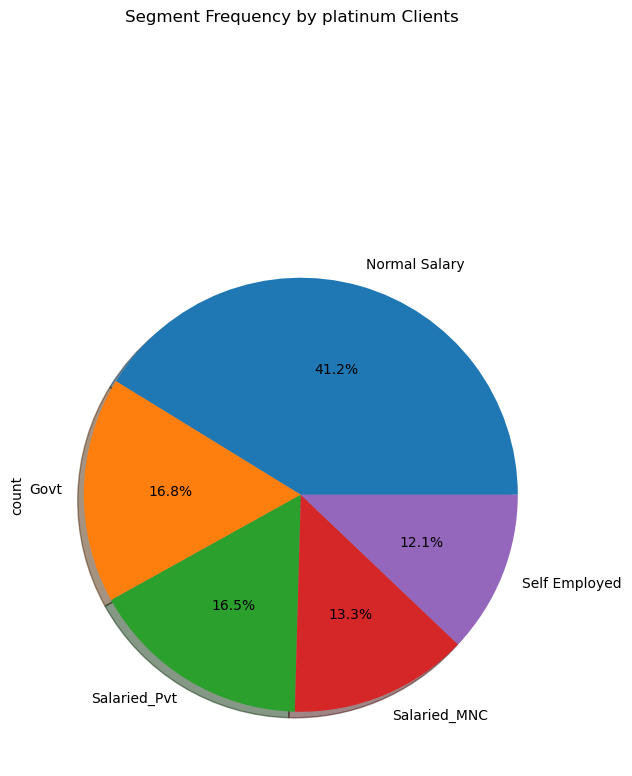

In [113]:
plt.figure(figsize=(7,10))
platinum["Segment"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.suptitle("Segment Frequency by platinum Clients")
plt.show()

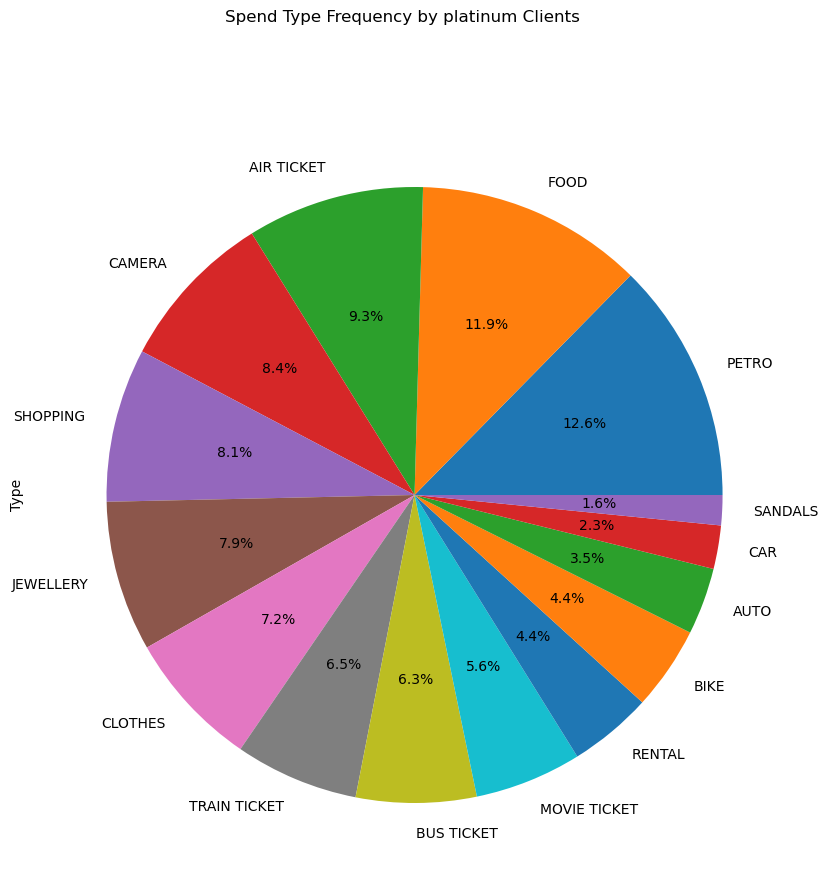

In [52]:
platinum["Type"].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,10),)
plt.suptitle("Spend Type Frequency by platinum Clients")
plt.show()